Device with name Apple M1 supports metal minimum requirements
METAL API - DETECTED GPU: Apple M1
Fra:1 Mem:12.59M (Peak 13.23M) | Time:00:00.08 | Syncing Light
Fra:1 Mem:12.59M (Peak 13.23M) | Time:00:00.08 | Syncing Camera
Fra:1 Mem:12.59M (Peak 13.23M) | Time:00:00.08 | Syncing Cube
Fra:1 Mem:12.78M (Peak 13.23M) | Time:00:00.09 | Rendering 1 / 64 samples
Fra:1 Mem:12.91M (Peak 13.23M) | Time:00:00.18 | Rendering 26 / 64 samples
Fra:1 Mem:12.91M (Peak 13.23M) | Time:00:00.24 | Rendering 51 / 64 samples
Fra:1 Mem:12.91M (Peak 13.23M) | Time:00:00.27 | Rendering 64 / 64 samples
Saved: 'test.png'
 Time: 00:00.36 (Saving: 00:00.09)



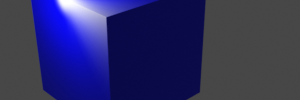

12:05:37 | ERROR: Draco mesh compression is not available because library could not be found at /Users/jan-hendrik/projects/ipyblender-experimental/further_ideas/Resources/3.6/python/lib/python3.10/site-packages/libextern_draco.dylib


In [1]:
import bpy
from IPython.display import Image, display

bpy.ops.preferences.addon_enable(module='io_scene_gltf2')

bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()
bpy.ops.mesh.primitive_cube_add(size=2, align="WORLD", location=(0, 1, 1))

cube = bpy.context.active_object

material = bpy.data.materials.new(name="BlueMaterial")
cube.data.materials.append(material)
material.use_nodes = True
nodes = material.node_tree.nodes

for node in nodes:
    nodes.remove(node)

bsdf = nodes.new(type="ShaderNodeBsdfPrincipled")
bsdf.location = (400, 0)
bsdf.inputs["Base Color"].default_value = (0, 0, 1, 1)  # Blue color

output = nodes.new(type="ShaderNodeOutputMaterial")
output.location = (600, 0)

material.node_tree.links.new(bsdf.outputs["BSDF"], output.inputs["Surface"])

light = bpy.data.objects["Light"]
light.location = (0, 0, 2)
camera = bpy.data.objects["Camera"]
camera.location = (5, -3, 4)
camera.data.dof.use_dof = True
camera.data.dof.focus_distance = 5
camera.data.dof.aperture_fstop = 4

path = "test.png"
bpy.context.scene.render.resolution_x = 300
bpy.context.scene.render.resolution_y = 100
bpy.context.scene.render.image_settings.file_format = "PNG"
bpy.context.scene.render.filepath = path
bpy.ops.render.render(write_still=True)
bpy.data.images["Render Result"].save_render(filepath=bpy.context.scene.render.filepath)

display(Image(path))

gltf_path = "./model_cube.gltf"
bpy.ops.object.select_all(action='DESELECT')
cube.select_set(True)
bpy.ops.export_scene.gltf(filepath=gltf_path, export_format='GLTF_EMBEDDED', use_selection=True)

from anywidget_3dviewer import Viewer
from pathlib import Path

gltf_path = Path() / "model_cube.gltf"
data = gltf_path.read_bytes()
gltf_path.unlink()

b = Viewer(gltf_data=data)
b